# What are the Senate of Ireland's bills about?

In [1]:
import json
import numpy as np
import os
import matplotlib.pyplot as plt

In [36]:
%matplotlib inline

In [2]:
seanad_data = json.load(open('data/congress/Ireland/seanad_data.json'))

In [3]:
len(seanad_data)

3530

In [37]:
# seanad_data[0]

In [5]:
seanad_data[0]['division']['debate']['showAs']

u'Diplomatic Relations (Miscellaneous Provisions) Bill 2017: Committee and Remaining Stages'

In [6]:
text = ''
for d in seanad_data:
    text += d['division']['debate']['showAs'] + '\n'

In [ ]:
# text

## WordClouds 

http://peekaboo-vision.blogspot.de/2012/11/a-wordcloud-in-python.html

https://github.com/amueller/word_cloud

In [7]:
from wordcloud import WordCloud

In [38]:
WordCloud?

In [43]:
wordcloud = WordCloud(max_font_size=40, 
                      max_words=1000,
                      width=1000, 
                      height=600).generate(text)

In [44]:
len(wordcloud.words_)

1000

In [45]:
list(wordcloud.words_)[:20]

[u'Strategy',
 u'Imposition',
 u'Regulation Bill',
 u'Homelessness',
 u'Damage',
 u'Garda S\xedoch\xe1na',
 u'\xc9ireann Bill',
 u'Olympics',
 u'Youth Unemployment',
 u'Progress',
 u'BILL THIRD',
 u'Resumed Juries',
 u'Nominations',
 u'Conflict',
 u'Scheme Motion',
 u'Non',
 u'Bill First',
 u'Draft Commission',
 u'Trade Agreement',
 u'Restrictive']

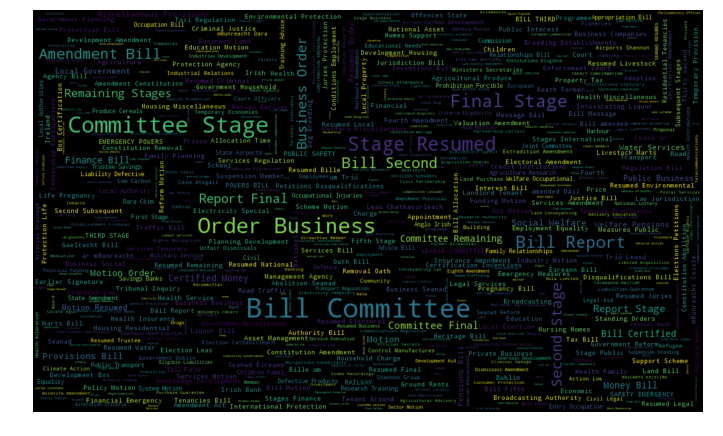

In [46]:
fig = plt.figure(figsize=(12, 16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig.savefig('image.png', format='png', dpi=100)
plt.show()

First version of WordCloud sed sklearn's count vectorizer:

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

CountVectorizer?

In [49]:
cv = CountVectorizer(min_df=0, stop_words="english", max_features=200)

In [50]:
counts = cv.fit_transform([text]).toarray().ravel()                                                  

In [51]:
len(counts)

200

In [52]:
counts

array([  36,   28,   17,   18,   17,   49,   21,   25,   27,   45,   21,
         20,   13,   14,   20,   22,   15,   41,   26,   15,   14,   18,
         23,   21,   20,   19,   22,   17,   18,   54,   40,   31,   35,
         55,   25,   55,   18,   38,   18,   23,   20,   13,   92,  154,
         57,  112,   93,  142,  108,   58,   74,   19,   14,   46,   21,
         18,   14,   14,   27,  394,   30,   19,   42,   17,   29,   14,
         27,  929,   16,  152,   16,   20,   23,   14,   15, 1260,   18,
         92,   19,   14,   17,   93,   21,   14,   97,   31,   47,   16,
         14,   42,   23,   23,   65,   22,   52,   23,   14,   21,   14,
         36,   35,  499,  162,   33,   22,   16,   18,   16,  101,   14,
        126,   20,   16,   66,   18,   21,   14,   25,   23,   17,   18,
         16,   43,   25,   62,   58,   44,   16,   31,   33,   13,   18,
         34,  139,   30,   33,   30,   21,   27,   17,   19,   98,  153,
        516,   73,   13,   13,   18,   14,   14,  7

In [53]:
words = np.array(cv.get_feature_names()) 

In [54]:
len(words)

200

In [55]:
words

array([u'1923', u'1924', u'1926', u'1927', u'1928', u'1929', u'1930',
       u'1931', u'1932', u'1933', u'1934', u'1935', u'1942', u'1958',
       u'1963', u'1965', u'1966', u'1967', u'1968', u'1969', u'1970',
       u'1973', u'1974', u'1975', u'1976', u'1982', u'1983', u'1984',
       u'1986', u'1987', u'1988', u'1989', u'1990', u'1991', u'1992',
       u'1993', u'1994', u'1995', u'1996', u'1997', u'2004', u'2007',
       u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014',
       u'2015', u'2016', u'2017', u'act', u'agency', u'agricultural',
       u'agriculture', u'aid', u'allocation', u'amended', u'amendment',
       u'ar', u'asset', u'authority', u'bank', u'bille', u'breeding',
       u'broadcasting', u'business', u'certain', u'certified',
       u'chathaoirleach', u'children', u'civil', u'coiste', u'commission',
       u'committee', u'companies', u'constitution', u'court', u'courts',
       u'credit', u'criminal', u'death', u'defence', u'development',
       u'dublin', 

In [56]:
# normalize                                                                                                                                       
counts = counts / float(counts.max())

In [57]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

Image?

In [58]:
width, height = 700, 800
img_grey = Image.new("L", (width, height))
draw = ImageDraw.Draw(img_grey)

In [59]:
# FILE = os.path.dirname(__file__)
# FONT_PATH = os.environ.get('FONT_PATH', os.path.join(FILE, 'DroidSansMono.ttf'))
font_path = 'DroidSansMono.ttf'
font_size = 4
max_font_size = 40
font = ImageFont.truetype(font_path, font_size)

In [60]:
# draw.setfont(font)
x = 10
y = 20
draw.text((x, y), "Text that will appear in white", fill="white")